<a href="https://colab.research.google.com/github/dusrbrla-mbb/kubig-portfolio/blob/temp/ml_exe_cycle_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 참고. 빅데이터분석기사 실기(CBT 시험 - 주어진 컴퓨터에서 보는 시험)
1. 주관식 단답형 3점 * 10 = 30점 -> 1 ~ 2개 틀림(필기 합격 시)
    * 이상치, 부스팅, 과적합 등
2. 작업 1번 유형 10점 * 3 = 30점 -> 0 ~ 1개 틀림
    * 판다스 활용 능력, 스케일링 정도까지
3. 작업 2번 유형 40점 * 1 = 40점 -> 부분점수 10 ~ 30점
    * 데이터 저장, 결측치, 이상치, model.fit, model.predict 등 활용, 하이퍼파라미터 튜닝은 최소한의 시간으로 최대한 찾기  
* 단, 현재 시험 환경이 주피터 노트북을 사용하지 않는 등 열악함.  
* 코드 실행 시간이 1분으로 제한되어, 하이퍼파라미터 튜닝 등 시간이 오래 걸리는 작업 불가능 -> 개선의 여지 있음  
* ADP와 달리, 시각화와 관련된 문제 출제 X
* 필기는 '데이터 분석' 과 '데이터 분석 기획' 이 3개 시험의 공통 범위.

### XAI - Explainable AI
##### 해석력(Explainability / Interpretability)
* Global / Local Interpretability -> 전역 / 지역 해석력
    * 전역 해석력 : feature 값 전체에 대한 경향성 해석
    * 지역 해석력 : feature 의 특정 row 에 대해 해석
* PDP, SHAP -> 수업시간에 다룰 2가지의 XAI 알고리즘

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Study/Jupyter'

<AxesSubplot: xlabel='hour', ylabel='regular'>

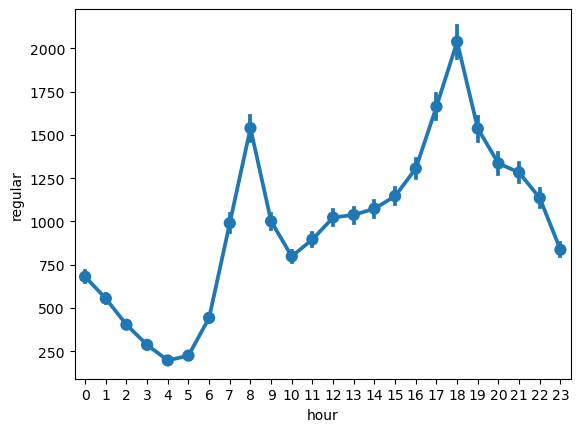

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv(path + '/' + 'clean_data.csv')
sns.pointplot(data=df, x='hour', y='regular')

### PDP(Partial Dependence Plot, 부분의존도)
##### feature - label 관계를 부분적으로 알아봄
* 모든 feature 가 아닌, 한 feature 를 골라잡고,  
이 feature 의 값이 label 에 어떤 영향을 주는지 해석.

/Users/kyg/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
/Users/kyg/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


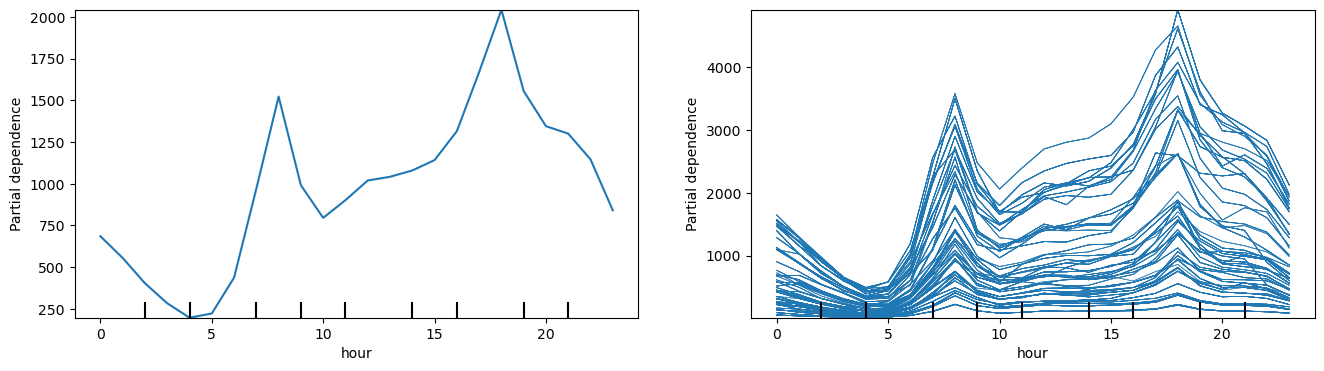

In [ ]:
from sklearn.inspection import plot_partial_dependence as pdp
from sklearn.ensemble import RandomForestRegressor as rf
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16, 4)
target = 'hour'
model = rf()
features = ['year', 'hour', 'month']
label = 'regular'
model.fit(df[features], df[label])
pdp(model, df[features], [target], kind='average', ax=ax1)
pdp(model, df[features], [target], kind='individual', ax=ax2)

In [ ]:
# 위 그래프는 label 을 설정하여 그린 그래프가 아님(label 은 전혀 이용하지 않음).
# 모델의 학습 결과인 model output(예측 결과) 을 활용하여 도출된 그래프.

# 학습 전 데이터 자체의 패턴을 나타낸 데이터 탐색 단계의 그래프와 비교시,
# 모델이 잘 학습되었음을 패턴을 비교하여 알 수 있음.
# 모델 자체가 별로이면, 변수 중요도를 활용하여 선택한 변수로 그린 그래프나 PDP 모두 이상한 결과를 보일 것.

# 위 그래프에서 왼쪽을 PDP, 오른쪽을 ICE 라 한다.
# 오른쪽 그래프를 평균한 것이 왼쪽.
# 한 row 에 대하여 특정 컬럼(hour)을 기준으로,
# 해당 컬럼의 값을 변화시켜가며 예측 모델의 결과를 도출.
# 그러면 한 row 마다 그래프 하나가 나옴.
# hour 컬럼을 0 ~ 23 으로 변화시키며 예측한 값 도출 시, hour 와 예측값 그래프
# 이 그래프를 따로 본 것이 오른쪽 ICE, 평균낸 것이 왼쪽 PDP.

In [ ]:
df.columns

Index(['year', 'month', 'day', 'hour', 'dayofweek', 'discomfort',
       'heat_stroke', 'frost_bite', 'windforce', 'regular', 'casual', 'group'],
      dtype='object')

In [ ]:
features = ['year', 'month', 'day', 'hour', 'dayofweek', 'discomfort',
       'heat_stroke', 'frost_bite', 'windforce']
label = 'regular'
X, y = df[features], df[label]
model = rf()
model.fit(X, y)

RandomForestRegressor()

/Users/kyg/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


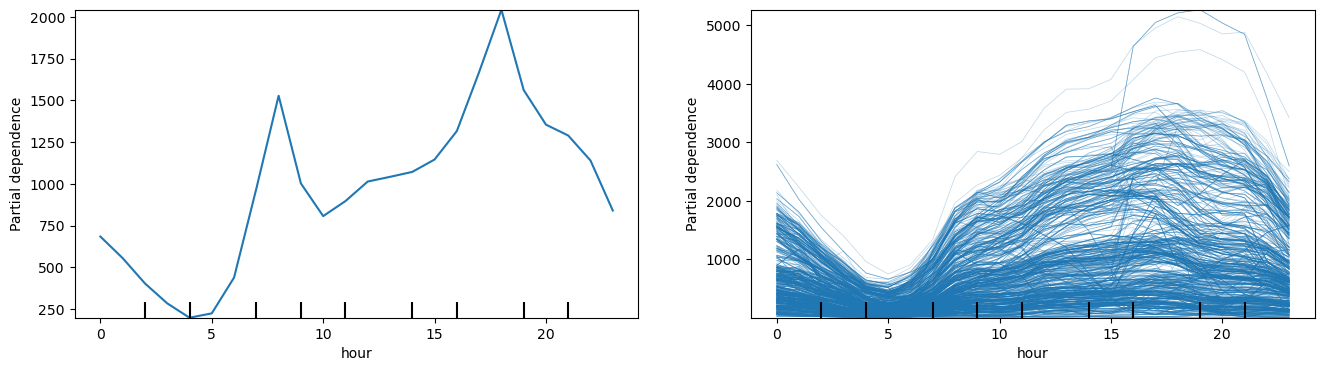

In [ ]:
# 주말 데이터만 추출
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16, 4)
target = 'hour'
tgt_X = X.loc[X['dayofweek'] >= 5]
pdp(model, tgt_X, [target], kind='average', ax=ax1)
pdp(model, tgt_X, [target], kind='individual', ax=ax2)
# 해당 라이브러리가 최근에 적용되어, PDP 가 완벽히 최적화되지 않음
# ICE 를 살펴보면 X.loc 의 결과(전체 -> 주말)가 반영되어 있지만, 왼쪽은 누적됨.

/Users/kyg/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


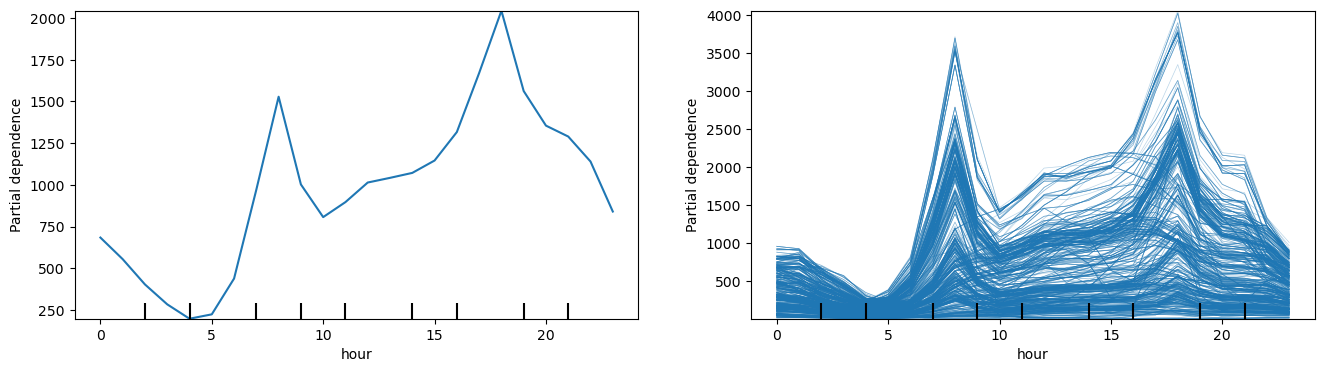

In [ ]:
# 겨울 데이터만 추출
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16, 4)
target = 'hour'
tgt_X = X.loc[(X['month'] <= 2) | (X['month'] >= 12)]
pdp(model, tgt_X, [target], kind='average', ax=ax1)
pdp(model, tgt_X, [target], kind='individual', ax=ax2)

/Users/kyg/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


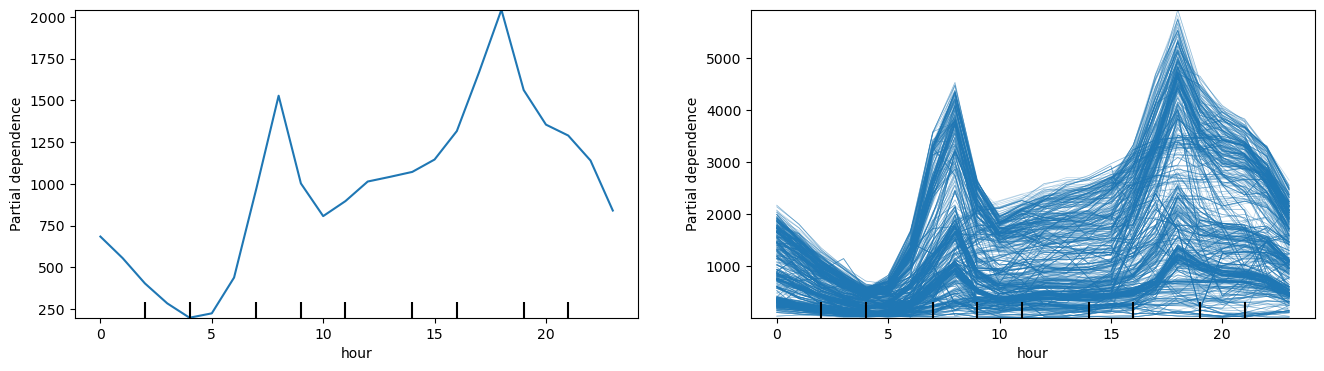

In [ ]:
# 여름 데이터만 추출
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16, 4)
target = 'hour'
tgt_X = X.loc[(X['month'] >= 6) & (X['month'] <= 8)]
pdp(model, tgt_X, [target], kind='average', ax=ax1)
pdp(model, tgt_X, [target], kind='individual', ax=ax2)
# 이외에도 target 또는 tgt_X 의 범위 바꾸어보며,
# 다양한 경향성을 확인해보고 유효한 패턴을 발견하여 문장 생성해보기

### PDP 는 변수 몇 개로 확인할 것인지에 따라 나뉜다.
##### One-Way / Two-Way -> 변수 하나만 보면 One-Way

/Users/kyg/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


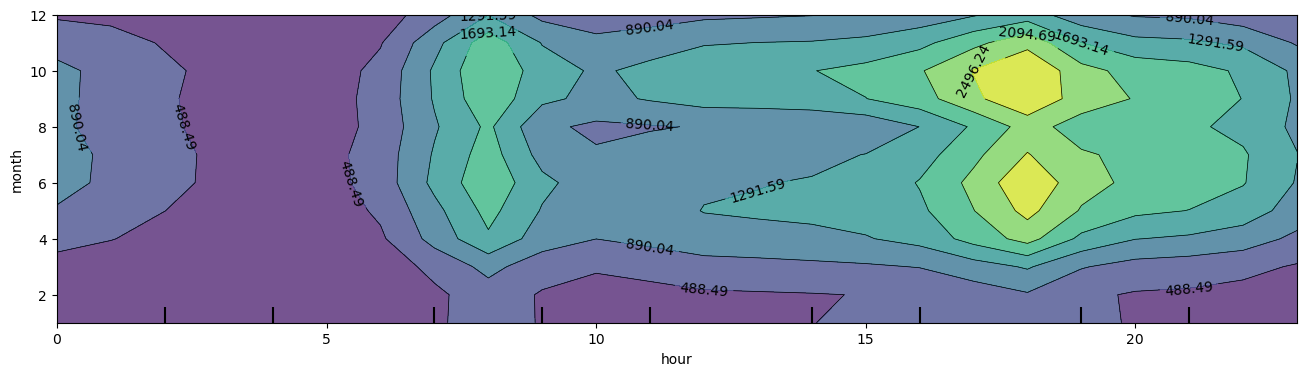

In [ ]:
fig, ax1 = plt.subplots() # subplots()를 사용하지 않아도 되지만, 크기 조정을 위해 사용
fig.set_size_inches(16, 4)
target = ('hour', 'month') # 리스트도 상관 없음
tgt_X = X
pdp(model, tgt_X, [target], kind='average', ax=ax1)

##### PDP Reference
* Zhao et el(2019) - Casual Interpretation of black-bok models
* Wright et el - Interpreting black box machine learning model ~ SAS Institute
* Goldstein et el(2015) - Peeking inside the Black Box

### SHAP - Global / Local Interpretability(둘 다 가능)
##### Ref : (Shapley, 1953), (Lundberg, 2017)
* 게임 이론상 최적화된 Shapley Value 를 찾기.

##### Shapley Value?
* 스포츠 팀에서 각 선수가 승리에 기여한 정도를 수치화한 개념
* 구단에서 선수 인건비로 할당한 금액 중, 선수별 승리 기여도 산출
* 각 선수에게 얼마의 연봉을 제시하는 것이 합당한지에 대한 개념

###### Shapley Value -> SHAP?
* 각 선수들이 feature
* 선수별로 승리에 기여한 정도(전투력), 연봉(Shapley Value) -> SHAP
* 승리가 label

##### SHAP 프로세스
* 해석하려는 row i 에서 j(독립변수) 가 특정 값일때 Shapley value 찾는 절차:
1. fitting 끝난 f, row i 준비.
2. X(데이터 셋) 로부터 랜덤 row인 z 를 선택.
3. 두 row 인 i 와 z를 f에 넣고 model.predict() 적용
4. Shapley value를 알아볼 j 컬럼값을 i <---> z 맞교환.
5. 4의 row i, z를 f에 넣고 model.predict() 적용
6. row i에서 j 의 값이 원본 vs 맞교환 비교
7. row z에서 j 의 값이 원본 vs 맞교환 비교
8. 6 ~ 7의 정보로부터 j의 값이 예측값(predict)에 주는 영향 확인.
* 마지막 단계:
    * 2 ~ 8단계를 반복하여 아래 작업을 수행한다.
    * row i의 j값이 원본 vs 맞교환 비교하여 평균한다.
    * 평균한 값이 기여도 Shapley value 이다.
    
SHAP 은 계산량이 많기 때문에, 데이터의 용량이 큰 경우(row 혹은 column 이 너무 많음), 속도가 너무 느려 사용 X

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


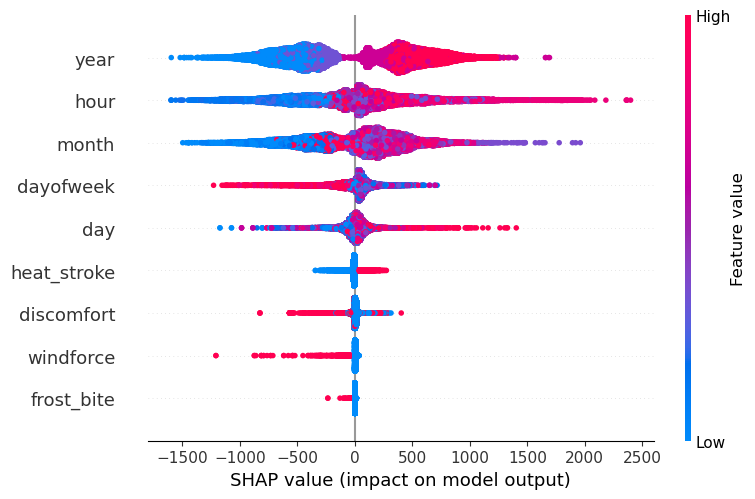

In [ ]:
import shap
shap.initjs()  # 시각화 용도로 자바스크립트 사용하는데, 이를 활성화
shap_values = shap.TreeExplainer(model).shap_values(X)
# shap.TreeExplainer(model) 은 SHAP 개념으로 model 을 해석할 것
# .shap_values(X) 는 shapley value 를 뽑아낸다는 의미
shap.summary_plot(shap_values, X)
# summary_plot 은 shapley value 들을 요약정리하는 한 장의 그림.
# feature - label 관계를 한 장의 그림으로 정리하므로 전역 해석력.

### 빨간색에 가까울수록 해당 컬럼의 값이 큰 것, 파란색에 가까울수록 작은 것.
### 점의 위치가 왼쪽일수록 예측값에 - 영향, 오른쪽일수록 예측에 + 영향.

In [ ]:
single_row = X.iloc[21000]
single_row
# 특정 row 를 하나 정하고, 이 row 에 대해 model output 이
# 어떻게 결정되는 것인지를 Shapley value 이용해 해석.

year           2019
month            11
day              16
hour              2
dayofweek         5
discomfort        0
heat_stroke       0
frost_bite        0
windforce         0
Name: 21000, dtype: int64

In [ ]:
import shap
explainer = shap.TreeExplainer(model)  # SHAP 으로 해석할 model 결정
single_val = explainer.shap_values(single_row)  
# 한 row 의 shapley_value 추출
shap.initjs()
shap.force_plot(explainer.expected_value, single_val, single_row)
# force_plot 은 shapley_value 가 label 에 미치는 + 또는 - 영향을
# 힘을 받아 움직인다고 해석한 것.

### 배깅 - Bagging = Bootstrap + aggregation
##### 학습 데이터를 복원추출해(bootstrap) 학습 개별적으로 진행 후 합산
* 회사의 채용 프로세스라고 가정하면 서로 다른 담당자가 점수를 각각 본인 입맛대로 맞춰서 평가.
* 의사결정나무 알고리즘을 불러와, 이를 조합하여 (유사)랜덤포레스트 구현.

In [ ]:
from sklearn.tree import DecisionTreeRegressor as dt
train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

In [ ]:
sampler = [1, 3, 5, 6, 6]
train.iloc[sampler]

,index,year,month,day,hour,dayofweek,discomfort,heat_stroke,frost_bite,windforce,regular,casual,group
1,2,2017,1,1,2,6,0,0,0,0,38.0,19.0,0.0
3,6,2017,1,1,6,6,0,0,0,0,14.0,5.0,0.0
5,10,2017,1,1,10,6,0,0,0,0,54.0,11.0,0.0
6,12,2017,1,1,12,6,0,0,0,0,81.0,31.0,2.0
6,12,2017,1,1,12,6,0,0,0,0,81.0,31.0,2.0


In [ ]:
from random import randint
tgt_idx = [randint(0, len(train) - 1) for i in range(len(train))]
train.iloc[tgt_idx]

,index,year,month,day,hour,dayofweek,discomfort,heat_stroke,frost_bite,windforce,regular,casual,group
7671,15342,2018,12,21,6,4,0,0,0,0,344.0,15.0,1.0
15530,31060,2020,12,21,14,0,0,0,0,0,1564.0,383.0,13.0
14049,28098,2020,8,24,13,0,2,2,0,0,1968.0,417.0,9.0
4186,8372,2017,12,15,13,4,0,0,0,0,285.0,40.0,0.0
15833,31666,2021,1,14,6,3,0,0,0,0,407.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,8696,2017,12,28,0,3,0,0,0,0,131.0,33.0,0.0
1077,2154,2017,4,8,5,5,0,0,0,0,41.0,7.0,0.0
7658,15316,2018,12,20,4,3,0,0,0,0,185.0,20.0,0.0
5130,10260,2018,4,5,1,3,0,0,0,0,284.0,88.0,1.0


In [ ]:
from random import randint
def bootstrap():  # return 으로 데이터 셋 생성하는 bootstrap 함수
    tgt_idx = [randint(0, len(train) - 1) for i in range(len(train))]
    return train.iloc[tgt_idx]

In [ ]:
multi_df = [bootstrap() for i in range(100)]
len(multi_df)  # 서로 조금씩 다른 100개의 데이터 셋

100

In [ ]:
forest = []
for single_df in multi_df:  # 무작위로 만든 100개의 다른 데이터 프레임
    X_single, y_single = single_df[features], single_df[label]
    tree = dt()
    tree.fit(X_single, y_single)  # 하나의 의사결정나무 알고리즘 학습
    forest.append(tree)  # 학습 끝난 알고리즘을 리스트에 추가
len(forest)

100

In [ ]:
forest[0].predict(X_test)
# forest 에는 학습 완료된 알고리즘들이 들어있기 때문에
# 예측을 시킬 수 있음.

array([  24.,   16.,    4., ...,    0.,  189., 1146.])

In [ ]:
i = 0
opinions = pd.DataFrame()
for single_tree in forest:
    i = i + 1
    opinions[str(i) + 'th_tree_say'] = single_tree.predict(X_test)
    # 알고리즘 하나당 의견이 있을 것이므로, 이를 opinions 에 추가.
opinions.head()
# 지금은 row 만 랜덤하게 뽑았지만,
# feature 도 랜덤하게 뽑는다면 랜덤성이 더 부여되어, randomforest 가 됨.

,1th_tree_say,2th_tree_say,3th_tree_say,4th_tree_say,5th_tree_say,6th_tree_say,7th_tree_say,8th_tree_say,9th_tree_say,10th_tree_say,...,91th_tree_say,92th_tree_say,93th_tree_say,94th_tree_say,95th_tree_say,96th_tree_say,97th_tree_say,98th_tree_say,99th_tree_say,100th_tree_say
0,24.0,80.0,34.0,63.0,24.0,53.0,63.0,34.0,80.0,34.0,...,63.0,86.0,46.0,31.0,80.0,53.0,67.0,31.0,31.0,63.0
1,16.0,16.0,16.0,38.0,16.0,38.0,18.0,16.0,16.0,20.0,...,16.0,16.0,13.0,38.0,15.0,20.0,29.0,38.0,18.0,23.0
2,4.0,4.0,16.0,32.0,16.0,28.0,23.0,19.0,16.0,20.0,...,16.0,19.0,16.0,32.0,13.0,20.0,33.0,23.0,4.0,23.0
3,27.0,24.0,24.0,36.0,34.0,34.0,34.0,27.0,34.0,36.0,...,23.0,34.0,34.0,27.0,34.0,34.0,34.0,36.0,34.0,24.0
4,45.0,81.0,45.0,45.0,45.0,47.0,45.0,54.0,47.0,54.0,...,45.0,45.0,45.0,54.0,45.0,45.0,45.0,45.0,47.0,45.0


In [ ]:
opinions.T.mean()
# 평균 계산시 aggregation(합산) 발생.

0         52.86
1         22.12
2         20.67
3         30.11
4         47.58
          ...  
16046    924.73
16047     48.96
16048     12.23
16049    212.87
16050    601.92
Length: 16051, dtype: float64

### MCOD(Monte Carlo Outlier Detection)
##### 몬테카를로 기반의 이상치 탐지법
* REF : (2009) A New Strategy of Outlier Detection for QSAR/QSPR

In [ ]:
i = 0
error_forest = pd.DataFrame()
for single_tree in forest:
    i = i + 1
    error = (y_test - single_tree.predict(X_test)) ** 2
    # 실제값과 예측값의 차이인 오차를 이용.
    error_forest[str(i) + 'th_tree_error'] = error
error_forest.head()
# 오차를 이용한 것을 제외하면, 배깅 방식과 동일함.

,1th_tree_error,2th_tree_error,3th_tree_error,4th_tree_error,5th_tree_error,6th_tree_error,7th_tree_error,8th_tree_error,9th_tree_error,10th_tree_error,...,91th_tree_error,92th_tree_error,93th_tree_error,94th_tree_error,95th_tree_error,96th_tree_error,97th_tree_error,98th_tree_error,99th_tree_error,100th_tree_error
0,961.0,625.0,441.0,64.0,961.0,4.0,64.0,441.0,625.0,441.0,...,64.0,961.0,81.0,576.0,625.0,4.0,144.0,576.0,576.0,64.0
1,36.0,36.0,36.0,256.0,36.0,256.0,16.0,36.0,36.0,4.0,...,36.0,36.0,81.0,256.0,49.0,4.0,49.0,256.0,16.0,1.0
2,289.0,289.0,25.0,121.0,25.0,49.0,4.0,4.0,25.0,1.0,...,25.0,4.0,25.0,121.0,64.0,1.0,144.0,4.0,289.0,4.0
3,16.0,49.0,49.0,25.0,9.0,9.0,9.0,16.0,9.0,25.0,...,64.0,9.0,9.0,16.0,9.0,9.0,9.0,25.0,9.0,49.0
4,16.0,1600.0,16.0,16.0,16.0,36.0,16.0,169.0,36.0,169.0,...,16.0,16.0,16.0,169.0,16.0,16.0,16.0,16.0,36.0,16.0


In [ ]:
MCOD = pd.DataFrame()
MCOD['mean_sq'] = error_forest.T.mean()
MCOD['std_sq'] = error_forest.T.std()
MCOD[features] = test[features]
MCOD.head()

,mean_sq,std_sq,year,month,day,hour,dayofweek,discomfort,heat_stroke,frost_bite,windforce
0,355.82,341.593514,2017,1,1,1,6,0,0,0,0
1,87.36,98.233439,2017,1,1,3,6,0,0,0,0
2,81.05,98.298800,2017,1,1,5,6,0,0,0,0
3,69.33,220.849144,2017,1,1,7,6,0,0,0,0
4,85.74,236.274178,2017,1,1,9,6,0,0,0,0


<AxesSubplot: xlabel='mean_sq', ylabel='std_sq'>

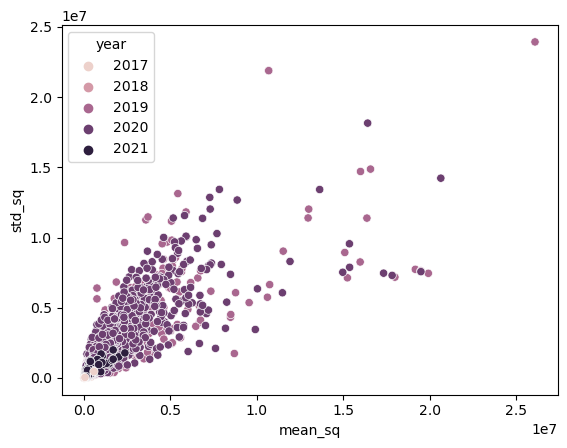

In [ ]:
import seaborn as sns
sns.scatterplot(data=MCOD, x='mean_sq', y='std_sq', hue='year')
# 평균이 높다는 것은 평균적으로 더 틀린 값을 이야기했다는 의미
# 표준편차가 높다는 것은 예측값이 중구난방이라는 의미

* reference 에서 말하는 위 도표 해석 방안

In [ ]:
MCOD.sort_values(by='mean_sq', ascending=False).head(10)

,mean_sq,std_sq,year,month,day,hour,dayofweek,discomfort,heat_stroke,frost_bite,windforce
9187,26093109.81,2.392884e+07,2019,5,27,8,0,0,0,0,0
13588,20642902.80,1.422563e+07,2020,7,23,18,3,0,0,0,0
9235,19920312.93,7.449815e+06,2019,5,31,7,4,0,0,0,0
13032,19491627.42,7.569292e+06,2020,6,10,18,2,1,0,0,0
9211,19486315.75,7.617997e+06,2019,5,29,7,2,0,0,0,0
9199,19167647.26,7.734244e+06,2019,5,28,7,1,0,0,0,0
9223,17986302.91,7.176940e+06,2019,5,30,7,3,0,0,0,0
14228,17825818.02,7.302171e+06,2020,9,7,19,0,0,0,0,0
13452,17331587.00,7.461009e+06,2020,7,13,17,0,0,0,0,0
9205,16574926.90,1.487240e+07,2019,5,28,19,1,0,0,0,0


##### hyper parameter tuning - 모델의 옵션을 조정하여 성능 향상을 도모
1. grid search - grid(격자) 형태로 경우의 수 조합 만들어 최상의 조합 탐색
2. random search - 말 그대로 옵션을 랜덤으로 바꿔가면서 성능 확인
3. 베이지안 옵티마이저
* 하이퍼파라미터를 함수에 넣는 값(정의역)이라 생각했을 때
* 평가지표 점수는 함수의 결과값(치역) 이라고 취급
* 정의역 변화에 따라 치역 달라짐을 이용.
* 같은 시간 대비 최적의 하이퍼파라미터 조합 찾는것이 보장됨.

In [ ]:
# 경진대회에서 가장 많이 사용되는 성능 TOP_3 알고리즘들
# XGBoost, CatBoost, LightGBM

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Study/Jupyter'
df = pd.read_csv(path + '/' + 'clean_data.csv')
features = ['year', 'month', 'day', 'hour', 'dayofweek', 'discomfort',
            'heat_stroke', 'frost_bite', 'windforce']
label = 'regular'
train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

In [ ]:
!pip install xgboost
!pip install bayesian-optimization

In [ ]:
from xgboost import XGBRegressor as xg
from bayes_opt import BayesianOptimization as bo
model = xg(learning_rate=0.5, colsample_bytree=0.5, 
           reg_lambda=0.3, max_depth=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


0.898434454081783

In [ ]:
lr = 0.5 
ct = 0.5 
rl = 0.3
md = 10
model = xg(learning_rate=lr, colsample_bytree=ct, 
           reg_lambda=rl, max_depth=md)
model.fit(X_train, y_train)
model.score(X_test, y_test)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


0.898434454081783

In [ ]:
def hyper_param(lr, ct, rl, md):
    # hyper_param 에는 옵션(하이퍼파라미터)들이 정의역으로 들어갑니다.
    model = xg(learning_rate=lr, colsample_bytree=ct, 
               reg_lambda=rl, max_depth=int(md))
    model.fit(X_train, y_train)
    return model.score(X_test, y_test) # 치역으로 성능(평가지표)이 나옴.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
epsilon = 0.1 ** 30
float_range = (epsilon, 1 - epsilon)
int_range = (5, 30)
pbounds = {'lr' : float_range, 'ct' : float_range, 
           'rl' : float_range, 'md' : int_range}
optimizer = bo(f = hyper_param, pbounds = pbounds)
optimizer.maximize(acq='poi', n_iter=20)

|   iter    |  target   |    ct     |    lr     |    md     |    rl     |
-------------------------------------------------------------------------
| 1         | 0.8246    | 0.9532    | 0.02067   | 12.89     | 0.133     |
| 2         | 0.2385    | 0.09782   | 0.03135   | 11.22     | 0.4014    |
| 3         | -0.3346   | 0.2058    | 0.00437   | 24.49     | 0.1591    |
| 4         | 0.5196    | 0.2849    | 0.04311   | 12.15     | 0.5872    |
| 5         | 0.6901    | 0.3368    | 0.9313    | 28.08     | 0.6959    |
| 6         | 0.9042    | 1.0       | 0.05849   | 14.79     | 0.7708    |
| 7         | 0.6109    | 1e-30     | 1.0       | 17.13     | 1e-30     |
| 8         | -0.9095   | 1.0       | 1e-30     | 30.0      | 1.0       |
| 9         | 0.6109    | 1e-30     | 1.0       | 14.27     | 1e-30     |
| 10        | -0.9095   | 1.0       | 1e-30     | 16.63     | 1.0       |
| 11        | 0.9325    | 0.7187    | 0.1546    | 13.85     | 0.6152    |
| 12        | 0.9201    | 0.9086    | 

In [ ]:
optimizer.max

{'target': 0.9324724581033463,
 'params': {'ct': 0.7186536233080852,
  'lr': 0.15456773259320183,
  'md': 13.852658796271685,
  'rl': 0.615214623104859}}